# Live demo for full NOTEARS algorithm

Import bokeh for the live plot.

In [1]:
import notears
import utils
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

## Create a problem instance

Simulate a random graph with `d` nodes and draw `n` samples from the graphical model.

`lambda1` is the l1-regularization parameter.

In [2]:
n, d = 100, 10
graph_type, degree, sem_type = 'erdos-renyi', 4, 'linear-gauss'
G = utils.simulate_random_dag(d, degree, graph_type)
X = utils.simulate_sem(G, n, sem_type)
pns_mask = np.random.binomial(1, 0.5, size=(d, d)).astype(np.float_)
lambda1 = 0.01

## Solve with live demo

We can monitor the progress of the augmented lagrangian algorithm. 

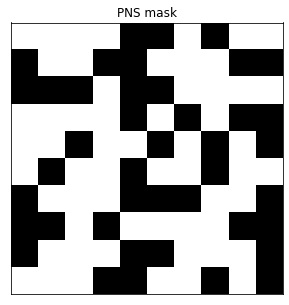

In [3]:
plt.figure(figsize=(5, 5))
ax = plt.subplot(1, 1, 1)
ax.imshow(pns_mask, cmap='gray')

ax.set_title('PNS mask')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

In [4]:
pns_mask = np.random.binomial(1, 0.5, size=(d, d)).astype(np.float_)
# pns_mask[:] = 1

In [5]:
W_est = notears.notears_live(G, X, pns_mask, lambda1)

In [6]:
assert np.all((1 - pns_mask) * W_est == 0.)

## Solve without live demo

If you don't want live demo, you can still run in the usual python interpreter by calling *notears()*.

In [7]:
W_est, _ = notears.notears(X, pns_mask, lambda1)
G_est = nx.DiGraph(W_est)
fdr, tpr, fpr, shd, nnz = utils.count_accuracy(G, G_est)
print(f'Accuracy: fdr {fdr:.4f}, tpr {tpr:.4f}, fpr {fpr:.4f}, shd {shd}, nnz {nnz}')

Accuracy: fdr 0.3913, tpr 0.4828, fpr 0.5625, shd 24, nnz 23


In [8]:
assert np.all((1 - pns_mask) * W_est == 0.)